# Capstone Project

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!pip install google-cloud-aiplatform

In [ ]:
!pip install google-resumable-media

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahism","key":"bdf34aa7241a1090b039e87127c9af28"}'}

In [1]:
!pip install tensorflow-gpu==2.4.0

     |████████████████████████████████| 394.7MB 45kB/s 
     |████████████████████████████████| 3.8MB 43.8MB/s 
     |████████████████████████████████| 471kB 40.7MB/s 
     |████████████████████████████████| 2.9MB 43.1MB/s 
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.32.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
  Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tenso

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6696        598  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3972        329  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1345        116  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
!kaggle datasets download -d kmader/food41

  0% 8.00M/5.30G [00:00<05:43, 16.5MB/s]
User cancelled operation


In [ ]:
!kaggle datasets download -d trolukovich/food11-image-dataset

 99% 1.07G/1.08G [00:18<00:00, 79.4MB/s]
100% 1.08G/1.08G [00:18<00:00, 62.2MB/s]


In [ ]:
!kaggle datasets download -d agrigorev/clothing-dataset-full

100% 6.50G/6.50G [02:24<00:00, 56.3MB/s]
100% 6.50G/6.50G [02:24<00:00, 48.4MB/s]


In [ ]:
! mkdir kaggle

In [ ]:
! unzip clothing-dataset-full.zip -d kaggle

In [ ]:
!kaggle datasets download -d madmaxliu/inceptionv3

 63% 49.0M/77.3M [00:01<00:01, 17.1MB/s]
100% 77.3M/77.3M [00:01<00:00, 44.3MB/s]


In [ ]:
! unzip inceptionv3.zip -d kaggle

Archive:  inceptionv3.zip
  inflating: kaggle/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [4]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
tf.__version__

'2.4.0'

In [ ]:
files.upload()

In [ ]:
!mv kelas.txt kaggle/

In [ ]:
import shutil
from pathlib import Path

path = os.getcwd()
kelas = path+"/kaggle/kelas.txt"
path_train = path+"/kaggle/meta/meta/train.txt"
path_test = path+"/kaggle/meta/meta/test.txt"
path_images = path+"/kaggle/images/"
path_ftrain = path+"/kaggle/train/"
path_ftest = path+"/kaggle/test/"

with open(kelas, "r") as f, open(path_train, "r") as g, open(path_test, "r") as h:
  g = g.readlines()
  h = h.readlines()
  
  for l1 in f:
    nama1 = l1.strip()

    for l2 in g:
      l2 = l2.strip()
      nama2 = l2.split("/")
      if nama2[0].strip() == nama1:
        Path(path_ftrain+nama1).mkdir(exist_ok=True)
        shutil.copy2(path_images+l2+".jpg", path_ftrain+nama1)

    for l2 in h:
      l2 = l2.strip()
      nama2 = l2.split("/")
      if nama2[0].strip() == nama1:
        Path(path_ftest+nama1).mkdir(exist_ok=True)
        shutil.copy2(path_images+l2+".jpg", path_ftest+nama1)


In [ ]:
shutil.rmtree(path_ftrain+"bread_pudding")

In [ ]:
shutil.rmtree("kaggle/training/baju")

In [ ]:
path_inception = f"{os.getcwd()}/kaggle/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape=(180, 180, 3), include_top=False, weights=None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 89, 89, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 89, 89, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 89, 89, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [6]:
from tensorflow.keras.applications import InceptionResNetV2

pre_trained_model = InceptionResNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet')

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

219062272/219055592 [==============================] - 1s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 89, 89, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 89, 89, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 89, 89, 32)   0           batch_normalization[0][0]        
_____________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7b')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [11]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D

input_tensor = Input(shape=(180, 180, 3))
bn = BatchNormalization()(input_tensor)

x = pre_trained_model(bn)
# Flatten the output layer to 1 dimension

x = Conv2D(128, kernel_size=(1,1), activation='relu')(x)

x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)   
x = layers.Dense(128, activation='relu')(x)              
# Add a final sigmoid layer for classification
x = layers.Dense(25, activation='softmax')(x)           

model = Model(input_tensor, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
batch_normalization_203 (Bat (None, 180, 180, 3)       12        
_________________________________________________________________
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 4, 4, 128)         196736    
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 24576)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              25166848  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               1

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!cp -R valacc-0,87 drive/MyDrive/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = os.getcwd()
train_dir = path+"/kaggle/training"
test_dir = path+"/kaggle/evaluation"

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   target_size=(180, 180)) 

validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                        batch_size=20,
                                                        target_size=(180, 180)) 

history = model.fit_generator(train_generator,
                             validation_data=validation_generator,
                             epochs=30,
                             verbose=1)

Found 11843 images belonging to 25 classes.
Found 3891 images belonging to 25 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
593/593 [==============================] - 662s 1s/step - loss: 2.2230 - acc: 0.3718 - val_loss: 0.9890 - val_acc: 0.7142
Epoch 2/30
593/593 [==============================] - 608s 1s/step - loss: 1.1658 - acc: 0.6527 - val_loss: 0.8051 - val_acc: 0.7682
Epoch 3/30
593/593 [==============================] - 595s 1s/step - loss: 0.9753 - acc: 0.7010 - val_loss: 0.7123 - val_acc: 0.7926
Epoch 4/30
593/593 [==============================] - 587s 990ms/step - loss: 0.8473 - acc: 0.7326 - val_loss: 0.6939 - val_acc: 0.7970
Epoch 5/30
593/593 [==============================] - 585s 986ms/step - loss: 0.7972 - acc: 0.7576 - val_loss: 0.6972 - val_acc: 0.8034
Epoch 6/30
593/593 [==============================] - 588s 991ms/step - loss: 0.7249 - acc: 0.7769 - val_loss: 0.6378 - val_acc: 0.8173
Epoch 7/30
593/593 [==============================] - 586s 989ms/step - loss: 0.6719 - acc: 0.7856 - val_loss: 0.6826 - val_acc: 0.8157
Epoch 8/30
593/593 [==============================] - 585

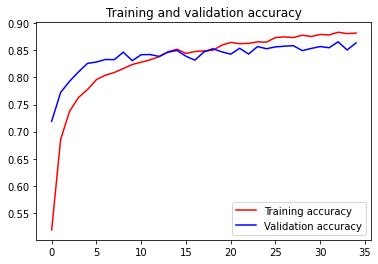

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#model.save('content/valacc-0,87')
model.save('content/valaccnew2-0,863')

INFO:tensorflow:Assets written to: content/valaccnew2-0,863/assets


In [ ]:
!cp -R content/valaccnew2-0,863/ drive/MyDrive/

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/valaccnew2-0,863')

In [ ]:
import PIL
import os
import numpy as np
from google.protobuf.struct_pb2 import Value
from google.protobuf import json_format

path = os.getcwd()+"/3.jpg"

img= PIL.Image.open(path)
#resizing the image to (2,2)
img = img.resize((180,180))
#converting image to array
img = np.asarray(img, dtype= np.float32)
#normalizing the image
img = img / 255
#reshaping the image in to a 4D array
img = img.reshape(180,180,3)

#pb_instance = json_format.ParseDict(img.tolist(), Value())
#making prediction of the model
#predict = model.predict(img)
#getting the index corresponding to the highest value in the prediction
#predict = np.argmax(predict)

#print(predict)

In [ ]:
from typing import Dict
import json

from operator import itemgetter
from google.cloud import aiplatform
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value


def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instance2,
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instance = json_format.ParseDict(instance2, Value())
    instances = [instance]
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances, parameters=parameters
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    predictions = response.predictions[0]
    raw = list(predictions)

    kelas = ['Bread', 'Egg', 'Fried food', 'Meat','Noodles-Pasta','Rice', 'Seafood','Soup','Vegetable-Fruit','asinan jakarta','bika ambon','donuts','dumplings','gudeg','macaroni','pempek','rendang','sate','surabi','susu']

    prob = zip(kelas, raw)
    sortedprob = sorted(prob,key=itemgetter(1),reverse=True)[0]
    hasil = {}
    hasil[str(sortedprob[0])] = sortedprob[1]

    kirim = json.dumps(hasil)
    """
    maxval = max(predictions[0])
    indek = predictions[0].index[maxval]
    """

    print(kirim)

    """
    for prediction in predictions:
        print(" prediction:", dict(prediction))
    """

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="packing-314306-a70c5da453d9.json"

In [ ]:
predict_custom_trained_model_sample(
    project="619788247629",
    endpoint_id="7389333865166274560",
    location="us-central1",
    instance2=img.tolist()
)

response
 deployed_model_id: 6268922720369508352
{"surabi": 0.997413337}


In [ ]:
kelas = {
    0: 'Bread', 
    1: 'Egg', 
    2: 'Fried food', 
    3: 'Meat',
    4: 'Noodles-Pasta',
    5: 'Rice', 
    6: 'Seafood',
    7: 'Soup',
    8: 'Vegetable-Fruit',
    9: 'asinan jakarta',
    10: 'bika ambon',
    11: 'donuts',
    12: 'dumplings',
    13: 'gudeg',
    14: 'macaroni',
    15: 'pempek',
    16: 'rendang'
    17: 'sate',
    18: 'surabi'
    19: 'susu'
}

In [ ]:
path_eval = os.getcwd()+"/kaggle/evaluation"

counter = 0
benar = 0

for i in os.listdir(path_eval):
  print("i = ", i)
  for item in os.listdir(os.path.join(path_eval, i)):
        #code to open the image
        img= PIL.Image.open(os.path.join(path_eval, i, item))
        #resizing the image to (256,256)
        img = img.resize((256,256))
        #converting image to array
        img = np.asarray(img, dtype= np.float32)
        #normalizing the image
        img = img / 255
        #reshaping the image in to a 4D array
        img = img.reshape(-1,256,256,3)
        #making prediction of the model
        predict = model.predict(img)
        #getting the index corresponding to the highest value in the prediction
        predict = np.argmax(predict)
        #appending the predicted class to the list

        counter = counter + 1
        print("kelas = ", kelas[predict])
        if kelas[predict] == str(i):
          benar = benar + 1

print("benar = ", benar)
print("counter = ", counter)

In [ ]:
print((benar/counter)*100)

87.09291903196893


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash 1> /dev/null
!gcloud init

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   443  100   443    0     0  16407      0 --:--:-- --:--:-- --:--:-- 16407
######################################################################## 100.0%
which curl
curl -# -f https://dl.google.com/dl/cloudsdk/channels/rapid/google-cloud-sdk.tar.gz
######################################################################## 100.0%
mkdir -p /root
tar -C /root -zxvf /tmp/tmp.Jdjb8wqOye/google-cloud-sdk.tar.gz
/root/google-cloud-sdk/install.sh
Beginning update. This process may take several minutes.


Your current Cloud SDK version is: 342.0.0
Installing components from version: 342.0.0

┌─────────────────────────────────────────────────────────────────────────────┐
│                     These components will be installed.                     │
├─────────────────────────────────────────────────────┬────────────┬──────────┤
│        

In [ ]:
!gsutil cp -r drive/MyDrive/valaccnew2-0,863 gs://packing-vertexnew

Copying file://drive/MyDrive/valaccnew2-0,863/saved_model.pb [Content-Type=application/octet-stream]...
Copying file://drive/MyDrive/valaccnew2-0,863/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

Copying file://drive/MyDrive/valaccnew2-0,863/variables/variables.index [Content-Type=appli

In [ ]:
#untunk training

import shutil
from pathlib import Path

databaru = os.getcwd()+"/drive/MyDrive/dataset/training"
datalama = os.getcwd()+"/kaggle/training"

#Path(path_ftrain+nama1).mkdir(exist_ok=True)
#shutil.copy2(path_images+l2+".jpg", path_ftrain+nama1)

for i in os.listdir(databaru):
  Path(os.path.join(datalama, i)).mkdir(exist_ok=True)
  for j in os.listdir(os.path.join(databaru, i)):
    shutil.copy2(os.path.join(databaru,i, j), os.path.join(datalama, i))

In [ ]:
datalama = os.getcwd()+"/kaggle/evaluation"

shutil.rmtree(datalama+"/Dessert")

In [ ]:
import PIL
PIL.__version__

'7.1.2'

In [ ]:
import numpy as np
np.__version__

'1.19.5'

In [ ]:
import PIL
from io import BytesIO
import base64
import requests
from google.protobuf import json_format
from google.cloud.aiplatform.gapic.schema import predict
from google.protobuf.struct_pb2 import Value

image_url = "https://storage.googleapis.com/packing-bucket/tesRecog.jpg"

try:
  image_response = requests.get(image_url, stream=True)
  image_response.raise_for_status()
  assert image_response.headers.get('Content-Type') == 'image/jpeg'

except (ConnectionError, requests.exceptions.RequestException,AssertionError):
  logging.error(f'Error fetching image from URL: {image_url}')

img = PIL.Image.open(BytesIO(image_response.content))
#resizing the image to (256,256)
img = img.resize((128,128))
#converting image to array
img = np.asarray(img, dtype= np.float32)
#normalizing the image
img = img / 255
#reshaping the image in to a 4D array
img = img.reshape(-1,128,128,3)
img = img.tolist()

pb_instance = json_format.ParseDict(img, Value())

print(pb_instance)
"""
#making prediction of the model
predict = model.predict(img)
#getting the index corresponding to the highest value in the prediction
predict = np.argmax(predict)

print(kelas[predict])
"""

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("fashion/images.csv")

In [ ]:
data['label'].unique()

array(['Not sure', 'T-Shirt', 'Shoes', 'Shorts', 'Shirt', 'Pants',
       'Skirt', 'Other', 'Top', 'Outwear', 'Dress', 'Body', 'Longsleeve',
       'Undershirt', 'Hat', 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer'],
      dtype=object)

In [ ]:
import shutil
from pathlib import Path
import os


#pilihan = ['T-Shirt', 'Shirt', 'Shoes', 'Shorts', 'Pants','Hat', 'Hoodie', 'Outwear']
pilihan = ['Hat']

databaru = os.getcwd()+"/fashion/images_original"
datalama1 = os.getcwd()+"/kaggle/training/topi"
datalama2 = os.getcwd()+"/kaggle/evaluation/topi"

for i in pilihan:
  print(i)
  img = data.loc[data['label'] == i]['image'].tolist()

  for j in range(0,int((80/100)*len(img))):
    shutil.copy2(os.path.join(databaru, img[j]+".jpg"), datalama1)
  
  for k in range(int((80/100)*len(img)), len(img)):
    shutil.copy2(os.path.join(databaru, img[k]+".jpg"), datalama2)

Hat


In [ ]:
data.loc[data['label'] == 'Hat']['image'].tolist()

['a283e901-d8da-4be1-91ae-2a3c94de48a2',
 '54e4e91f-b255-4e2d-906f-c482432a7048',
 'b6899eaa-fe32-4547-9217-05bbcb09c217',
 '08b939da-2a7f-46a3-8126-194e09432c3f',
 '2d6afa47-fd6f-4b2b-9e51-010280547753',
 '708af227-43ba-4e2b-b35b-652a13cd1c77',
 'a9db59ad-5a9c-4c5d-9a5a-a8aed629cc23',
 '66807c84-da44-4af2-b9be-3848a52a7073',
 '26fca408-4412-466b-972a-3a160051534a',
 '70731fd8-417c-4d20-94c5-56cf17a7178e',
 '7cd2e634-94bf-43f8-a95b-a840e7f79bf1',
 '014b2a1b-c5a0-469b-b115-bc02b2001db5',
 '14d9f39c-48f5-4da6-bea4-b9f8b94633ed',
 '2b3113c3-d37d-47f5-a784-20fb12228365',
 '19b8f13e-9f17-4fcc-a4cd-7496672b1675',
 'a9c5f50d-abad-46f0-9bc1-4cef08015143',
 '324b3d8f-3a20-4668-b58b-b4083ed1039a',
 '73ac436f-d222-491e-8603-70bf6f1f6ad9',
 '24fcfe3e-4ea1-481e-9f39-37a2edcb2c99',
 '127708b5-72ad-4793-9512-3d33427459bb',
 'a0b289ae-458d-434d-8814-32a7699f62e3',
 '755595ad-51a0-419f-b132-b412c2523ae4',
 'be7311c6-84f7-4e59-b0f4-3a94f6ced3f3',
 'a8f612a6-a966-451b-9dd3-364a4b200dc1',
 '69ecd6f7-e2f0-

In [ ]:
import PIL
from IPython.display import display

hehe = data.loc[data['label'] == 'Outwear']

path = "fashion/images_compressed/"

gambar = path+str(hehe['image'].tolist()[55])+".jpg"
gambar = PIL.Image.open(gambar)
display(gambar)


In [10]:
for i in os.listdir("kaggle/training"):
  print(i)

donuts
asinan_jakarta
bika_ambon
Noodles-Pasta
pempek
Soup
Egg
dumplings
Vegetable-Fruit
celana
Bread
Meat
topi
baju
Rice
macaroni_and_cheese
rendang
Fried food
outwear
surabi
Seafood
sate
sepatu
susu
gudeg


In [8]:
!rm -rf kaggle/evaluation/.ipynb_checkpoints

In [3]:
!cp -R drive/MyDrive/kaggle kaggle